In [247]:
import pandas as pd
import seaborn as sns

df = pd.read_parquet('../../../amalur-factorization/profiling/all_1repeat_operators_cleaned.parquet')
df.head()

,id,kernel_name,compute_throughput,dram_frequency,dram_throughput,duration,elapsed_cycles,l1_throughput,l1_hit_rate,l2_throughput,...,dram_bytes_read,dram_bytes_write,filename,gpu,experiment,block_size,grid_size,type,operator,dataset
0,0,cupy_copy__int64_int64,0.00,3.786260e+09,0.01,4192.0,3338.0,48.45,0.0,0.31,...,128.0,0.0,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...,a10g,all_1repeat_operators,"(2, 1, 1)","(1, 1, 1)",factorized,LMM,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...
1,1,void cub::DeviceScanInitKernel<cub::ScanTileSt...,0.01,4.186667e+09,0.01,3200.0,2832.0,76.68,0.0,0.37,...,128.0,0.0,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...,a10g,all_1repeat_operators,"(128, 1, 1)","(1, 1, 1)",factorized,LMM,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...
2,2,void cub::DeviceScanKernel<cub::DeviceScanPoli...,0.14,4.026144e+09,0.01,4896.0,4210.0,30.61,1.0,0.78,...,128.0,0.0,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...,a10g,all_1repeat_operators,"(128, 1, 1)","(1, 1, 1)",factorized,LMM,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...
3,3,void cusparse::<unnamed>::binary_search_partit...,0.16,5.339790e+09,7.30,13216.0,14889.0,7.74,1.0,1.35,...,494592.0,0.0,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...,a10g,all_1repeat_operators,"(128, 1, 1)","(8, 1, 1)",factorized,LMM,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...
4,4,void cusparse::<unnamed>::binary_search_lb_ker...,11.92,5.381468e+09,78.83,53184.0,60297.0,18.30,1.0,33.93,...,15289472.0,6371200.0,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...,a10g,all_1repeat_operators,"(128, 1, 1)","(977, 1, 1)",factorized,LMM,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...


In [248]:
counts = df.groupby(['operator', 'type', 'gpu'])['id'].count()

In [249]:
df.groupby(['operator', 'type', 'gpu', 'dataset']).sum().head()

/tmp/ipykernel_73794/3331590880.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['operator', 'type', 'gpu', 'dataset']).sum().head()


id  \
operator        type       gpu  dataset                                                  
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  66   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  66   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  66   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  66   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  66   

                                                                                    compute_throughput  \
operator        type       gpu  dataset                                                                  
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...               82.19   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...               86.13   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...               71.81   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...               84.80   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...               71.67   

                                                                                    dram_frequency  \
operator        type       gpu  dataset                                                              
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...    6.223956e+10   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...    6.316146e+10   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...    6.274250e+10   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...    6.321743e+10   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...    6.316845e+10   

                                                                                    dram_throughput  \
operator        type       gpu  dataset                                                               
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...           108.18   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...           106.33   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...            49.94   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...           110.73   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...            48.72   

                                                                                    duration  \
operator        type       gpu  dataset                                                        
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  504800.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  428416.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  659552.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  496352.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  565696.0   

                                                                                    elapsed_cycles  \
operator        type       gpu  dataset                                                              
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...        741755.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...        628416.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...        974515.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...        

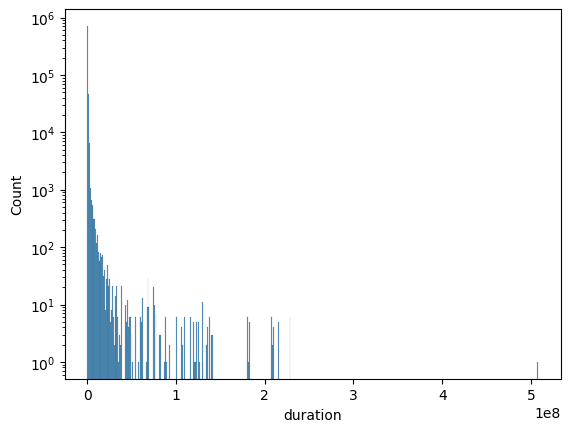

In [250]:
ax = sns.histplot(df['duration'], binwidth=0.01e8,)
ax.set_yscale('log')

In [251]:
import matplotlib.pyplot as plt
plt.show()

In [252]:
# Aggregate per operator: weighted mean of of metrics and sum of duration

In [253]:
import numpy as np
units = {
    "compute_throughput": "percent",
    "dram_frequency": "cycle/second",
    "dram_throughput": "percent",
    "duration": "nsecond",
    "elapsed_cycles": "cycle",
    "l1_throughput": "percent",
    "l1_hit_rate": "percent",
    "l2_throughput": "percent",
    "l2_hit_rate": "percent",
    "max_bandwidth": "percent",
    "mem_busy": "percent",
    "mem_pipes_busy": "percent",
    "memory_throughput": "percent",
    "memory_throughput_byte": "byte/second",    
    "sm_active_cycles": "cycle",
    "sm_frequency": "cycle/second",
    "dram_bytes_read": "byte",
    "dram_bytes_write": "byte",
}

def weighted_mean(values, weights):
    return np.sum(weights * values) / np.sum(weights)

def sum(values, *args):
    return np.sum(values)

def mean(values, *args):
    return np.mean(values)

def none(x, *args):
    return None

agg_functions = {
    "percent": weighted_mean,
    "cycle/second": none,
    "nsecond": sum,
    "cycle": sum,
    "byte": sum,
    "cycle/second": weighted_mean,
    "byte/second": weighted_mean
}

def aggregate(df):
    res = {}
    for col, unit in units.items():
        func = agg_functions.get(unit, none)
        res[f"{col}_{func.__name__}"] = func(df[col], df['duration'])
    return pd.Series(res)
aggregated_df = df.groupby(['operator', 'type', 'gpu', 'dataset']).apply(aggregate)

In [254]:
import json
with open ("/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1/daic/features/gpu-characteristics.json") as f:
    gpu_chars = json.load(f)
gpu_chars['1080'] = gpu_chars.pop('1080Ti')
gpu_chars['p100'] = gpu_chars.pop('P100')
gpu_chars['v100'] = gpu_chars.pop('V100')
gpu_chars['2080'] = gpu_chars.pop('2080Ti')
gpu_chars['a40'] = gpu_chars.pop('A40')
gpu_chars['a10g'] = gpu_chars.pop('A10G')
gpu_chars['1660'] = gpu_chars.pop('1660Ti')
gpu_chars_df = pd.DataFrame(gpu_chars).T.apply(pd.to_numeric, errors='ignore')
gpu_chars_df.rename(columns={x: f"gpu_{x}" for x in gpu_chars_df.columns}, inplace=True)
gpu_chars_df

,gpu__architecture,gpu__number_of_sm,gpu__cores,gpu_cache_size_l1,gpu_cache_size_l2,gpu_clock_speed_base,gpu_clock_speed_max_boost,gpu_memory_bus_width,gpu_memory_size,gpu_memory_clock,gpu_memory_bandwidth,gpu_processing_power_half_precision,gpu_processing_power_single_precision,gpu_processing_power_double_precision
1080,Pascal,28,3584,48,2.8,1480,1582,352,11,11000,484,0.17,10.61,0.3315
p100,Pascal,56,3584,24,4.0,1126,1303,4096,16,1430,732,21.20,10.60,5.3000
v100,Volta,80,5120,128,6.2,1230,1370,4096,32,1750,900,112.22,14.03,7.0140
2080,Turing,68,4352,64,5.5,1350,1545,352,11,14000,616,23.50,11.75,0.3168
a40,Ampere,84,10752,128,6.0,1305,1740,384,48,7248,696,149.68,37.42,1.1680
a10g,Ampere,72,9216,128,6.0,1320,1710,384,24,6252,600,31.52,31.52,0.9850
1660,Turing,24,1536,64,1.5,1500,1770,192,6,12000,288,9.22,4.61,0.1440


In [255]:
with_gpu_chars = aggregated_df.reset_index().merge(gpu_chars_df, left_on='gpu', right_index=True)


In [256]:
with_gpu_chars.describe()

,compute_throughput_weighted_mean,dram_frequency_weighted_mean,dram_throughput_weighted_mean,duration_sum,elapsed_cycles_sum,l1_throughput_weighted_mean,l1_hit_rate_weighted_mean,l2_throughput_weighted_mean,l2_hit_rate_weighted_mean,max_bandwidth_weighted_mean,...,gpu_cache_size_l2,gpu_clock_speed_base,gpu_clock_speed_max_boost,gpu_memory_bus_width,gpu_memory_size,gpu_memory_clock,gpu_memory_bandwidth,gpu_processing_power_half_precision,gpu_processing_power_single_precision,gpu_processing_power_double_precision
count,3325.000000,3.325000e+03,3325.000000,3.325000e+03,3.325000e+03,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,...,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000
mean,14.641988,6.166919e+09,49.870619,6.589266e+07,9.046961e+07,24.723216,0.792557,25.147054,0.998170,52.057471,...,4.616842,1370.133835,1738.827068,324.985263,26.775338,8363.534436,537.332932,65.568589,25.291092,0.789851
std,12.007644,7.445471e+08,32.645978,1.241962e+08,1.745653e+08,13.090989,0.245024,15.325347,0.002930,33.249635,...,2.076627,86.749559,24.233282,88.602773,17.069381,2458.036057,170.857690,61.869082,13.996067,0.436993
min,0.187153,4.516258e+09,0.187558,4.041600e+04,4.992300e+04,1.183345,0.162334,0.117662,0.988710,0.352169,...,1.500000,1305.000000,1710.000000,192.000000,6.000000,6252.000000,288.000000,9.220000,4.610000,0.144000
25%,6.346482,5.640872e+09,11.968378,1.249120e+06,1.706370e+06,17.420489,0.742629,8.203190,0.997149,13.472628,...,1.500000,1305.000000,1710.000000,192.000000,6.000000,6252.000000,288.000000,9.220000,4.610000,0.144000
50%,14.613694,6.121370e+09,59.942321,6.973952e+06,8.782419e+06,25.050272,0.901870,29.999453,1.000000,65.012265,...,6.000000,1320.000000,1740.000000,384.000000,24.000000,7248.000000,600.000000,31.520000,31.520000,0.985000
75%,17.703415,6.746321e+09,82.593110,7.083533e+07,9.156360e+07,32.549017,0.967614,38.662071,1.000000,84.494477,...,6.000000,1500.000000,1770.000000,384.000000,48.000000,12000.000000,696.000000,149.680000,37.420000,1.168000
max,81.060451,9.474108e+09,91.209112,7.227483e+08,1.090849e+09,79.766301,0.999598,47.969233,1.000000,91.235039,...,6.000000,1500.000000,1770.000000,384.000000,48.000000,12000.000000,696.000000,149.680000,37.420000,1.168000


In [257]:
with_gpu_chars[[x for x in with_gpu_chars.columns if 'l1' in x or 'l2' in x or 'dram' in x]]

,dram_frequency_weighted_mean,dram_throughput_weighted_mean,l1_throughput_weighted_mean,l1_hit_rate_weighted_mean,l2_throughput_weighted_mean,l2_hit_rate_weighted_mean,dram_bytes_read_sum,dram_bytes_write_sum,gpu_cache_size_l1,gpu_cache_size_l2
0,5.585885e+09,6.732479,5.541501,0.976926,7.548491,1.000000,8.365440e+06,4.146880e+05,64,1.5
1,5.640872e+09,7.149560,5.925364,0.973708,7.923254,1.000000,7.561504e+06,3.811520e+05,64,1.5
2,5.668171e+09,4.906661,6.361888,0.981563,5.559798,1.000000,8.498912e+06,3.016640e+05,64,1.5
3,5.666172e+09,6.718101,5.670674,0.976662,7.601705,1.000000,8.561120e+06,4.009280e+05,64,1.5
4,5.623562e+09,5.535707,6.357983,0.980032,6.276584,1.000000,8.195616e+06,2.589760e+05,64,1.5
...,...,...,...,...,...,...,...,...,...,...
3320,7.776221e+09,9.434067,26.856021,0.926148,6.982541,1.000000,1.154509e+08,3.584000e+03,128,6.0
3321,6.748394e+09,9.665799,26.742579,0.926008,7.227809,1.000000,1.154484e+08,2.816000e+03,128,6.0
3322,5.963211e+09,58.677727,35.010319,0.942614,36.332214,1.000000,1.225429e+09,5.688818e+08,128,6.0
3323,7.096939e+09,83.946295,29.252095,0.682232,42.132908,0.994407,1.903227e+10,1.580797e+10,128,6.0


In [258]:
# math cost = sm_active_cycles / sm frequency
with_gpu_chars['math_cost_seconds'] = with_gpu_chars['sm_active_cycles_sum'] / with_gpu_chars['sm_frequency_weighted_mean']
with_gpu_chars['dram_bytes_sum'] = (with_gpu_chars['dram_bytes_read_sum'] + with_gpu_chars['dram_bytes_write_sum'])
with_gpu_chars['mem_cost_seconds'] = with_gpu_chars['dram_bytes_sum'] / with_gpu_chars['memory_throughput_byte_weighted_mean']
# Throughput as percentage of max / 100 = throughput as fraction. Multiply by max bandwidth to achieved bytes per second
with_gpu_chars['ops_per_second'] = ((with_gpu_chars.compute_throughput_weighted_mean / 100) * (with_gpu_chars.gpu_processing_power_double_precision * 1e12))
# Ops/s * duration = ops, ops / dram bytes = arithmetic intensity
with_gpu_chars['arithmetic_intensity'] = ((with_gpu_chars['ops_per_second'] * (with_gpu_chars.duration_sum / 1e9)) / (with_gpu_chars['dram_bytes_sum'] ))
with_gpu_chars[['math_cost_seconds', 'mem_cost_seconds', 'dram_bytes_sum', 'arithmetic_intensity', 'ops_per_second']].describe()

,math_cost_seconds,mem_cost_seconds,dram_bytes_sum,arithmetic_intensity,ops_per_second
count,3325.000000,3325.000000,3.325000e+03,3325.000000,3.325000e+03
mean,0.062634,0.065893,2.619098e+10,0.602421,1.043645e+11
std,0.123583,0.124196,5.329358e+10,0.843619,1.157158e+11
min,0.000008,0.000040,1.978624e+06,0.093491,1.115195e+09
25%,0.000540,0.001249,1.207996e+08,0.241170,2.588211e+10
50%,0.004460,0.006974,7.153737e+08,0.361784,8.154943e+10
75%,0.065843,0.070835,3.240908e+10,0.650058,1.529190e+11
max,0.721162,0.722748,2.735128e+11,9.018444,9.332151e+11


In [259]:
(with_gpu_chars.math_cost_seconds / with_gpu_chars.mem_cost_seconds).describe()

count    3325.000000
mean        0.741346
std         0.292248
min         0.016198
25%         0.565603
50%         0.886544
75%         0.979640
max         1.001116
dtype: float64

In [260]:
# looks like mem_cost_seconds is a perfect approximation of duration_sum, so probably wrong calc...
(max(with_gpu_chars.mem_cost_seconds, ) / (with_gpu_chars.duration_sum / 1e9)).describe()

count     3325.000000
mean      1336.432825
std       3473.604422
min          1.000000
25%         10.203218
50%        103.635398
75%        578.605969
max      17882.726841
Name: duration_sum, dtype: float64

In [261]:
pd.Series(np.maximum(with_gpu_chars.math_cost_seconds, with_gpu_chars.mem_cost_seconds)/ (with_gpu_chars.duration_sum / 1e9)).describe()

count    3325.000000
mean        1.000000
std         0.000021
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.001116
dtype: float64

In [262]:
# # ax = sns.scatterplot(data=with_gpu_chars, x='math_cost_seconds', y='duration_sum', hue='gpu')
# ax = sns.kdeplot(with_gpu_chars.mem_cost_seconds  (with_gpu_chars.duration_sum / 1e9))
# # ax.set_xlim(0.9999999999994123, 1.000000000000605)
# ax.get_xlim()

In [263]:
with_gpu_chars[(with_gpu_chars.mem_cost_seconds < with_gpu_chars.math_cost_seconds)]

,operator,type,gpu,dataset,compute_throughput_weighted_mean,dram_frequency_weighted_mean,dram_throughput_weighted_mean,duration_sum,elapsed_cycles_sum,l1_throughput_weighted_mean,...,gpu_memory_clock,gpu_memory_bandwidth,gpu_processing_power_half_precision,gpu_processing_power_single_precision,gpu_processing_power_double_precision,math_cost_seconds,dram_bytes_sum,mem_cost_seconds,ops_per_second,arithmetic_intensity
584,LMM,factorized,1660,--mnt--data--1M--n_R=1-r_T=1000000-c_T=40-rho_...,79.717999,5.968769e+09,12.670825,23252768.0,35067366.0,29.950645,...,12000,288,9.22,4.61,0.144,0.023265,8.322212e+08,0.023253,1.147939e+11,3.207412
1822,RMM,materialized,1660,--mnt--data--1M--n_R=1-r_T=1000000-c_T=20-rho_...,15.405249,5.726367e+09,80.044852,271364704.0,408065788.0,41.309924,...,12000,288,9.22,4.61,0.144,0.271668,5.974991e+10,0.271365,2.218356e+10,0.100751


(1, 10000.0)

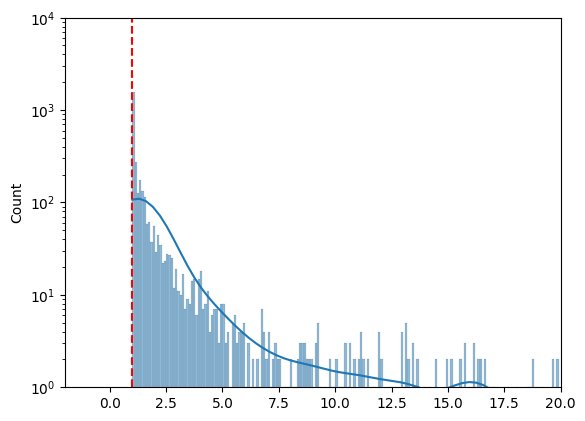

In [264]:
# ax = sns.scatterplot(data=with_gpu_chars, x='math_cost_seconds', y='duration_sum', hue='gpu')
ax = sns.histplot(with_gpu_chars.mem_cost_seconds / with_gpu_chars.math_cost_seconds, kde=True)
ax.set_xlim(-2, 20)
ax.axvline(1.0, color='red', linestyle='--')
ax.set_yscale('log')
ax.set_ylim(1, 1e4)

/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/amalur-factorization/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/amalur-factorization/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(5.222222222222223, 0.5, 'Math cost (s) $=\\frac{sm\\_active\\_cycles\\_sum}{sm\\_frequency\\_weighted\\_mean}$')

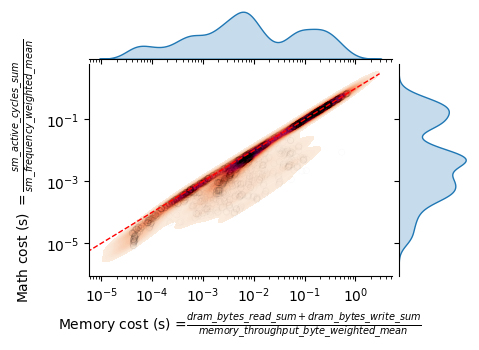

In [265]:
grid=sns.jointplot(data=with_gpu_chars, x='mem_cost_seconds', y='math_cost_seconds', ax=ax,
              kind='kde',log_scale=True, fill=True, levels=100,thresh=0.01,
              height=3.4, ratio=4, space=0.1,
              cmap="rocket_r",
#                     #  hue='operator'
                     )
grid.figure.set_figwidth(5)
grid.figure.set_figheight(3.4)
ax=grid.ax_joint
ax.scatter(with_gpu_chars.mem_cost_seconds, with_gpu_chars.math_cost_seconds, s=20, facecolors='none', edgecolors='black', linewidths=0.5, alpha=0.02)
range = np.arange(0, 1000, 0.1)
sns.lineplot(x=range, y=range, color='red', linestyle='--', linewidth=1, ax=ax)
ax.set_xlabel(r'Memory cost (s) =$\frac{dram\_bytes\_read\_sum + dram\_bytes\_write\_sum}{memory\_throughput\_byte\_weighted\_mean}$')
ax.set_ylabel(r'Math cost (s) $=\frac{sm\_active\_cycles\_sum}{sm\_frequency\_weighted\_mean}$')
# ax.set_xlim(with_gpu_chars.math_cost_seconds.min(), with_gpu_chars.math_cost_seconds.max())
# ax.set_ylim(with_gpu_chars.mem_cost_seconds.min(), with_gpu_chars.mem_cost_seconds.max())
# ax.set_yscale('log')
# ax.set_xscale('log')
# grid.savefig("/home/pepijn/Documents/uni/y5/thesis/writing/overleaf/chapters/05_cost_estimation/figures/profiling-mem-vs-compute.pdf")

[Text(0, 0, 'Columnsummation'),
 Text(1, 0, 'ColumnsummationT'),
 Text(2, 0, 'LMM'),
 Text(3, 0, 'LMMT'),
 Text(4, 0, 'Leftmultiply'),
 Text(5, 0, 'LeftmultiplyT'),
 Text(6, 0, 'RMM'),
 Text(7, 0, 'RMMT'),
 Text(8, 0, 'Rightmultiply'),
 Text(9, 0, 'RightmultiplyT'),
 Text(10, 0, 'Rowsummation'),
 Text(11, 0, 'RowsummationT')]

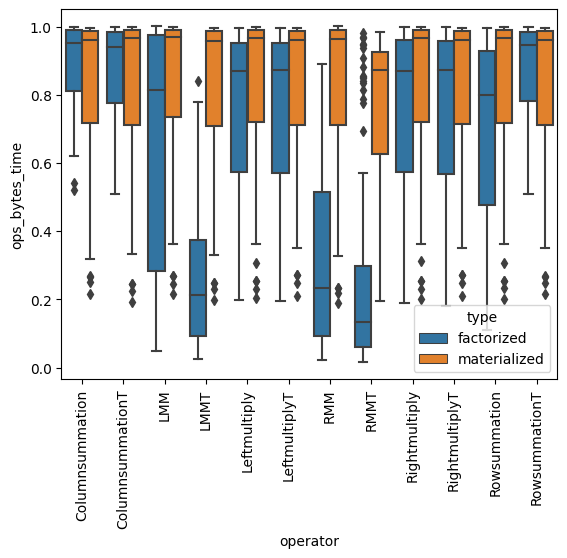

In [266]:
with_gpu_chars['ops_bytes_time'] = with_gpu_chars['math_cost_seconds']/ with_gpu_chars['mem_cost_seconds']
ax = sns.boxplot(data=with_gpu_chars, y='ops_bytes_time', x='operator', hue='type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# ax.set_yscale('log')
# ax.set_xscale('log')


## Attempt at Roofline chart

In [267]:
with_gpu_chars[['sm_frequency_weighted_mean', 'dram_bytes_read_sum', 'sm_active_cycles_sum', 'arithmetic_intensity']].describe()

,sm_frequency_weighted_mean,dram_bytes_read_sum,sm_active_cycles_sum,arithmetic_intensity
count,3.325000e+03,3.325000e+03,3.325000e+03,3325.000000
mean,1.309712e+09,1.636084e+10,8.602435e+07,0.602421
std,1.152614e+08,3.436361e+10,1.735166e+08,0.843619
min,9.973247e+08,1.978624e+06,1.293916e+04,0.093491
25%,1.227125e+09,1.005920e+08,6.953073e+05,0.241170
50%,1.298425e+09,5.472980e+08,5.683796e+06,0.361784
75%,1.395104e+09,1.844634e+10,8.506497e+07,0.650058
max,1.704576e+09,1.885684e+11,1.084526e+09,9.018444


<Axes: xlabel='ops_per_second', ylabel='Count'>

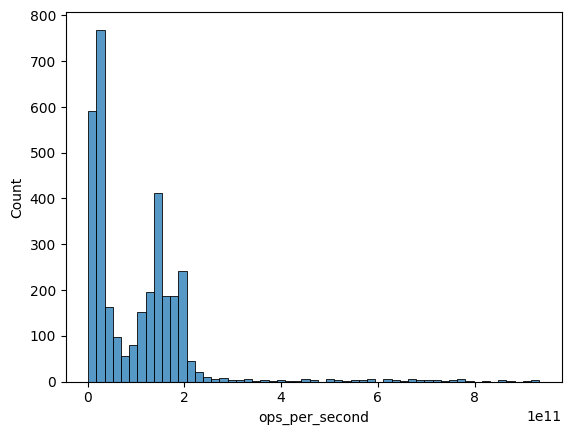

In [268]:
sns.histplot(with_gpu_chars['ops_per_second'])

In [269]:
with_gpu_chars.groupby(["gpu", "type"]).count()

operator  dataset  compute_throughput_weighted_mean  \
gpu  type                                                                
1660 factorized         543      543                               543   
     materialized       479      479                               479   
a10g factorized         576      576                               576   
     materialized       576      576                               576   
a40  factorized         576      576                               576   
     materialized       575      575                               575   

                   dram_frequency_weighted_mean  \
gpu  type                                         
1660 factorized                             543   
     materialized                           479   
a10g factorized                             576   
     materialized                           576   
a40  factorized                             576   
     materialized                           575   

                   dram_throughput_weighted_mean  duration_sum  \
gpu  type                                                        
1660 factorized                              543           543   
     materialized                            479           479   
a10g factorized                              576           576   
     materialized                            576           576   
a40  factorized                              576           576   
     materialized                            575           575   

                   elapsed_cycles_sum  l1_throughput_weighted_mean  \
gpu  type                                                            
1660 factorized                   543                          543   
     materialized                 479                          479   
a10g factorized                   576                          576   
     materialized                 576                          576   
a40  factorized                   576                          576   
     materialized                 575                          575   

                   l1_hit_rate_weighted_mean  l2_throughput_weighted_mean  \
gpu  type                                                                   
1660 factorized                          543                          543   
     materialized                        479                          479   
a10g factorized                          576                          576   
     materialized                        576                          576   
a40  factorized                          576                          576   
     materialized                        575                          575   

                   ...  gpu_memory_bandwidth  \
gpu  type          ...                         
1660 factorized    ...                   543   
     materialized  ...                   479   
a10g factorized    ...                   576   
     materialized  ...                   576   
a40  factorized    ...                   576   
     materialized  ...                   575   

                   gpu_processing_power_half_precision  \
gpu  type                                                
1660 factorized                                    543   
     materialized                                  479   
a10g factorized                                    576   
     materialized                                  576   
a40  factorized                                    576   
     materialized                                  575   

                   gpu_processing_power_single_precision  \
gpu  type                                                  
1660 factorized                                      543   
     materialized                                    479   
a10g factorized                                      576   
     materialized                                    576   
a40  factorized                                      576   
     materialized                       

In [270]:
min(with_gpu_chars['arithmetic_intensity'])

0.09349130060989749

In [271]:
# Create separate dataframes for 'factorized' and 'materialized' types
df_factorized = with_gpu_chars[with_gpu_chars['type'] == 'factorized']
df_materialized = with_gpu_chars[with_gpu_chars['type'] == 'materialized']

# Merge the two dataframes on the 'operator', 'gpu', and 'dataset' columns
merged_df = pd.merge(df_factorized, df_materialized, on=['operator', 'gpu', 'dataset'], suffixes=('_factorized', '_materialized'), how='left')

# Select the required columns
new_df = merged_df[['operator', 'type_factorized', 'gpu', 'dataset', 'arithmetic_intensity_factorized', 'arithmetic_intensity_materialized']]

# Rename the 'type_factorized' column to 'type'
new_df = new_df.rename(columns={'type_factorized': 'type'})

# higher is better
new_df['arithmetic_intensity_ratio'] = new_df['arithmetic_intensity_factorized'] / new_df['arithmetic_intensity_materialized']

new_df.describe()

,arithmetic_intensity_factorized,arithmetic_intensity_materialized,arithmetic_intensity_ratio
count,1695.000000,1629.000000,1629.000000
mean,0.854588,0.340333,2.810305
std,1.108223,0.200215,3.382621
min,0.108060,0.093491,0.562138
25%,0.318451,0.197631,1.225761
50%,0.521373,0.295468,1.635391
75%,0.814769,0.429408,2.707046
max,9.018444,1.091673,29.718484


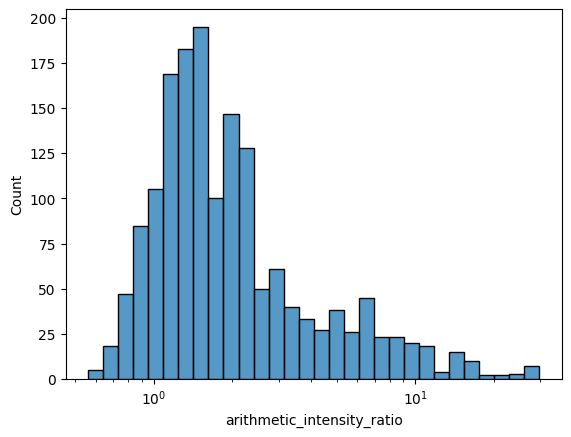

In [272]:
ax = sns.histplot(new_df['arithmetic_intensity_ratio'], log_scale=True)

In [273]:
2**5.4

42.22425314473263

/tmp/ipykernel_73794/240080537.py:13: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for subaxs, (name, group) in zip(axs.T, with_gpu_chars.groupby(["gpu"])):


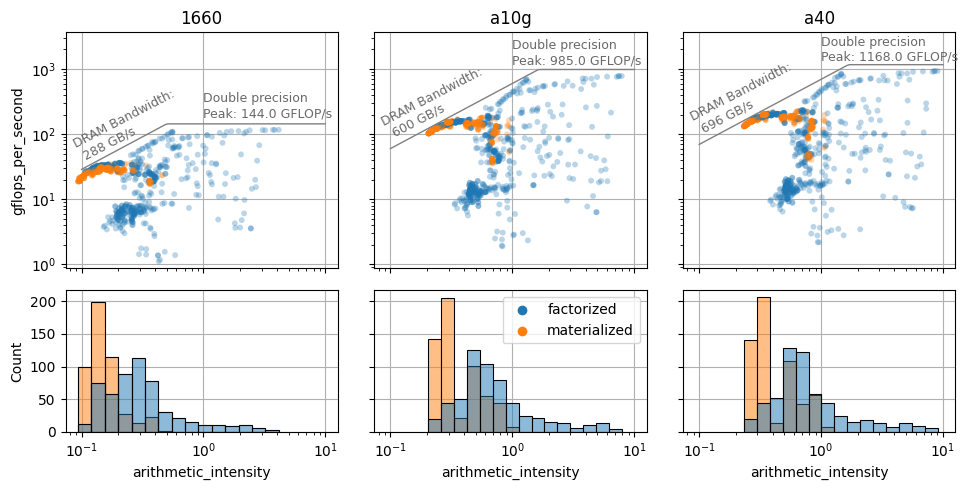

In [293]:
with_gpu_chars["gflops_per_second"] = with_gpu_chars["ops_per_second"] / 1e9
y_lim_max_flops = with_gpu_chars["gflops_per_second"].max()
fig, axs = plt.subplots(
    2, 3, figsize=(10, 5.0), sharey="row", sharex=True, gridspec_kw={"height_ratios": [2.5, 1.5]}
)


annot_locs = {
    "1660": (10**0, 2**7.5),
    "a10g": (10**0, 2**10.2),
    "a40":(10**0, 2**10.4)
}
for subaxs, (name, group) in zip(axs.T, with_gpu_chars.groupby(["gpu"])):
    ax = subaxs[0]
    bandwidth = group["gpu_memory_bandwidth"].iloc[0]
    max_flops = group["gpu_processing_power_double_precision"].iloc[0] * 1e3
    xs = np.logspace(-1, 1, 100)
    ys = [min(bandwidth * x, max_flops) for x in xs]

    ax.plot(xs, ys, color="grey", linewidth=1)
    ax.annotate(
        f"DRAM Bandwidth:\n {bandwidth} GB/s",
        xy=[xs[0], ys[0]**1.10],
        fontsize=9,
        rotation=27.5,
        rotation_mode="anchor",
        color="dimgray",
    )
    
    ax.annotate(
        f"Double precision\nPeak: {max_flops} GFLOP/s",
        xy=annot_locs[name],
        fontsize=9,
        color="dimgray",
    )

    sns.scatterplot(
        data=group, x="arithmetic_intensity", y="gflops_per_second", hue="type", ax=ax, alpha=0.3, size=1, linewidth=0
    )
    ax.set_title(name)
    ax.set_yscale("log", base=10)
    ax.set_ylim(top=y_lim_max_flops**1.2)
    ax = subaxs[1]
    # sns.kdeplot(data=group, x='arithmetic_intensity', hue='type', ax=ax, log_scale=True)
    sns.histplot(
        data=group,
        x="arithmetic_intensity",
        hue="type",
        ax=ax,
        kde=False,
        stat="count",
        log_scale=(10, False),
        bins=15,
        legend=True,
    )

axs = axs.flatten()
x_min = min(ax.get_xlim()[0] for ax in axs.flatten())
x_max = min(ax.get_xlim()[0] for ax in axs.flatten())
handles, labels = axs[0].get_legend_handles_labels()
for ax in axs:
    ax.grid()
    ax.set_axisbelow(True)
    ax.get_legend().remove()
    # ax.set_yscale('log')
    # ax.set_xscale('log')
    # ax.set_xlim(0.0, x_max)

# axs[0].legend(handles[:2], labels[:2], loc='lower right')
axs[4].legend(handles[:2], labels[:2], loc="upper right")

fig.tight_layout()
fig.savefig("/home/pepijn/Documents/uni/y5/thesis/writing/overleaf/chapters/05_cost_estimation/figures/roofline-plot.pdf")

In [275]:
with_gpu_chars.columns

Index(['operator', 'type', 'gpu', 'dataset',
       'compute_throughput_weighted_mean', 'dram_frequency_weighted_mean',
       'dram_throughput_weighted_mean', 'duration_sum', 'elapsed_cycles_sum',
       'l1_throughput_weighted_mean', 'l1_hit_rate_weighted_mean',
       'l2_throughput_weighted_mean', 'l2_hit_rate_weighted_mean',
       'max_bandwidth_weighted_mean', 'mem_busy_weighted_mean',
       'mem_pipes_busy_weighted_mean', 'memory_throughput_weighted_mean',
       'memory_throughput_byte_weighted_mean', 'sm_active_cycles_sum',
       'sm_frequency_weighted_mean', 'dram_bytes_read_sum',
       'dram_bytes_write_sum', 'gpu__architecture', 'gpu__number_of_sm',
       'gpu__cores', 'gpu_cache_size_l1', 'gpu_cache_size_l2',
       'gpu_clock_speed_base', 'gpu_clock_speed_max_boost',
       'gpu_memory_bus_width', 'gpu_memory_size', 'gpu_memory_clock',
       'gpu_memory_bandwidth', 'gpu_processing_power_half_precision',
       'gpu_processing_power_single_precision',
       'gpu_pro

Need: 
- compute time
- math time
- cost is max(compute time, math time)
- GPUs ops:bytes ratio

In [276]:
with_gpu_chars['bytes']

KeyError: 'bytes'

## Add calculated metrics

- dram_read = dram_bytes_read_sum
- dram_latency = ???
- dram_time = dram_read / memory_throughput_byte_weighted_mean
- l1 hitrate = l1_hit_rate_weighted_mean
- l1 latency = ???
- l1 bandwidth = 

l2 read = (1 - l2 hitrate) * dram_read

l2 read = (l1 miss * l1_read)

dram_read  = (l1 miss * l1_read) + (l2 miss * (l1 miss * l1_read))

l1_read = dram_read / (l2 miss * l1 miss + l1 miss)

- l1 amount read = 
- l2 hitrate = 
- l2 latency = 
- l2 bandwidth = 
- l2 amount read = 


from https://arxiv.org/pdf/1804.06826.pdf (V100)
 - L1 latency (cycles) 28
 - L2 latency (cycles) 193
 - DRAM latency


$$Teff = h1*t1 + (1-h1)*h2*t2 + (1-h1)*(1-h2)*t3$$
 - h1: l1_hit_rate_weighted_mean
 - t1 (micros): 30 cycles = 30 / gpu_clock_speed_base
 - h2: l2_hit_rate_weighted_mean
 - t2 (micros): 200 / gpu_clock_speed_base
 - t3: 600 / gpu_clock_speed_base

In [ ]:
clock_speed_base = with_gpu_chars["gpu_clock_speed_base"]
l1_latency_ns = 30 / clock_speed_base * 1000
l2_latency_ns = 100 / clock_speed_base * 1000
dram_latency_ns = 600 / clock_speed_base * 1000
l1_hitrate = with_gpu_chars["l1_hit_rate_weighted_mean"]
l2_hitrate = (1 - l1_hitrate) * with_gpu_chars["l2_hit_rate_weighted_mean"]
dram_hitrate = (1 - l1_hitrate) * (1 - l2_hitrate)
with_gpu_chars["mem_time_eff_ns"] = (
    l1_hitrate * l1_latency_ns
    + l2_hitrate * l2_latency_ns
    + dram_hitrate * dram_latency_ns
)
with_gpu_chars['mem_cost_test'] = ((with_gpu_chars["mem_time_eff_ns"] + with_gpu_chars["dram_bytes_read_sum"]) / 1e9 / with_gpu_chars["mem_cost_seconds"])
with_gpu_chars.groupby("gpu")['mem_cost_test'].describe()

,count,mean,std,min,25%,50%,75%,max
gpu,,,,,,,,
1660,1022.0,87.608489,47.652180,1.436142,38.142708,103.238382,128.338897,182.544616
a10g,1152.0,185.164319,119.658971,1.288929,56.222906,205.501300,282.561185,505.088527
a40,1151.0,207.246413,138.576276,1.086725,56.934109,224.877212,324.450350,551.286160


count    3325.000000
mean        1.272631
std         0.953279
min         0.008490
25%         0.406330
50%         1.064291
75%         2.159570
max         4.306944
dtype: float64

In [ ]:
with_gpu_chars['calc_l2_read_sum'] =((1 - with_gpu_chars.l2_hit_rate_weighted_mean ) * with_gpu_chars.dram_bytes_read_sum)
with_gpu_chars['calc_l1_read_sum'] =((1 - with_gpu_chars.l1_hit_rate_weighted_mean ) * with_gpu_chars.calc_l2_read_sum)

In [ ]:
with_gpu_chars[['dram_bytes_read_sum', 'l2_hit_rate_weighted_mean', 'calc_l2_read_sum', 'calc_l1_read_sum']]

,dram_bytes_read_sum,l2_hit_rate_weighted_mean,calc_l2_read_sum,calc_l1_read_sum
0,8.365440e+06,1.000000,0.000000e+00,0.000000e+00
1,7.561504e+06,1.000000,0.000000e+00,0.000000e+00
2,8.498912e+06,1.000000,0.000000e+00,0.000000e+00
3,8.561120e+06,1.000000,0.000000e+00,0.000000e+00
4,8.195616e+06,1.000000,0.000000e+00,0.000000e+00
...,...,...,...,...
3320,1.154509e+08,1.000000,0.000000e+00,0.000000e+00
3321,1.154484e+08,1.000000,0.000000e+00,0.000000e+00
3322,1.225429e+09,1.000000,0.000000e+00,0.000000e+00
3323,1.903227e+10,0.994407,1.064488e+08,3.382599e+07


In [ ]:
tranpose = with_gpu_chars[with_gpu_chars.gpu == 'a10g'].head().T

In [ ]:
def cache_cost(df):
    

In [ ]:
aggregated_df['cache_cost'] = aggregated_df['l1_hit_rate_weighted_mean'] * aggregated_df['l1_throughput_weighted_mean'] + aggregated_df['l2_hit_rate_weighted_mean'] * aggregated_df['l2_throughput_weighted_mean']

operator         type          gpu   dataset                                                                                                                                        
Columnsummation  factorized    1660  --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_c_S=0.1-rho_c_R=0.1-p=0.0-join=inner--ratio_9.5--data--_preset                                        504800.0
                                     --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_c_S=0.1-rho_c_R=0.1-p=0.0-join=left-t_R=0.6--ratio_8.5--data--_preset                                 428416.0
                                     --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_c_S=0.1-rho_c_R=0.1-p=0.1-join=outer-t_R=0.7-rho_r_S=0.9--ratio_5.0--data--_preset                    659552.0
                                     --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_c_S=0.1-rho_c_R=0.1-p=0.1-join=outer-t_R=0.9-rho_r_S=1.0--ratio_7.5--data--_preset                    496352.0
                                     --

In [ ]:
testdf.groupby(['operator', 'type', 'gpu', 'dataset']).apply(lambda x: weighted_mean(x['duration'], x['compute_throughput'])).head()

operator          type          gpu   dataset                                                                                                                         
ColumnsummationT  materialized  a10g  --mnt--data--1M--n_R=1-r_T=1000000-c_T=40-rho_c_S=0.1-rho_c_R=0.1-p=0.1-join=outer-t_R=0.7-rho_r_S=0.9--ratio_5.0--data--_preset    13.746692
LMM               factorized    a10g  --mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_c_S=0.3-rho_c_R=0.3-p=0.1-join=outer-t_R=0.2-rho_r_S=1.0--ratio_1.0--data--_preset    72.314885
dtype: float64

operator
ColumnsummationT    Axes(0.125,0.11;0.775x0.77)
LMM                 Axes(0.125,0.11;0.775x0.77)
dtype: object

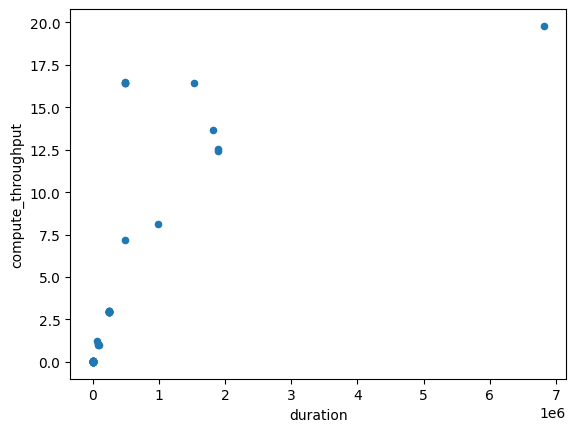

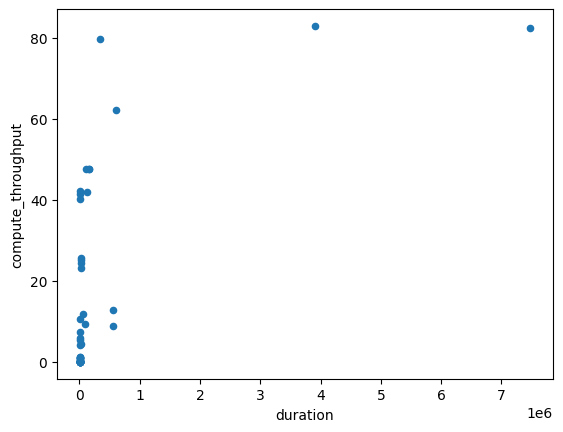

In [ ]:
testdf.groupby('operator').plot(x='duration', y='compute_throughput', kind='scatter', )

In [ ]:
testdf = df.head(100).copy()
testdf['sm_freq_compute'] = testdf["sm_active_cycles"] / testdf["duration"]
testdf[['sm_freq_compute', 'sm_frequency']]

metric,sm_freq_compute,sm_frequency
0,0.004430,7.960060e+08
1,0.003669,8.843304e+08
2,0.006038,8.595938e+08
3,0.096859,1.126200e+09
4,0.990490,1.132612e+09
...,...,...
47,1.309943,1.316059e+09
48,0.836680,1.219399e+09
49,1.311582,1.323093e+09
50,0.855133,1.243248e+09


/tmp/ipykernel_81919/1349319077.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumdf = df.groupby(['operator', 'type', 'gpu', 'dataset']).sum().reset_index(drop=False)


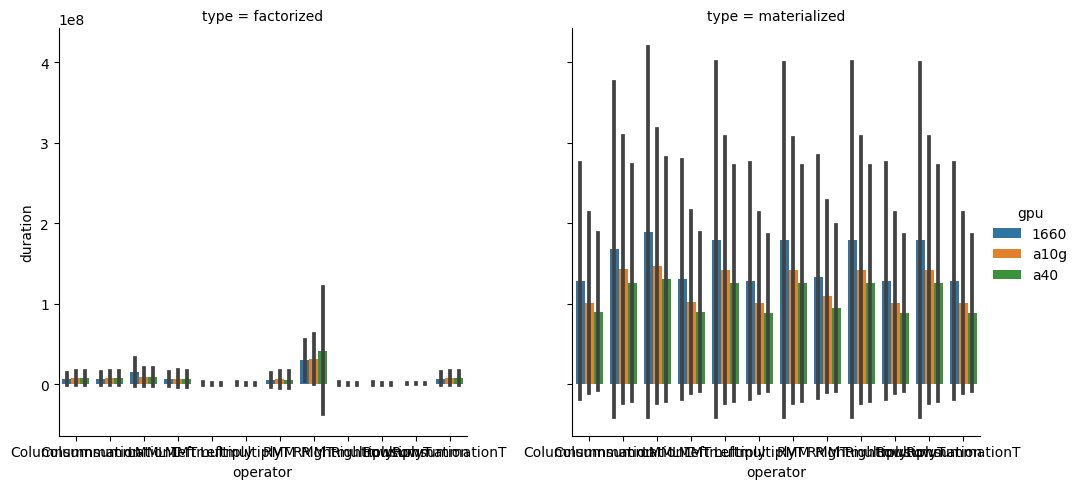

In [ ]:
sumdf = df.groupby(['operator', 'type', 'gpu', 'dataset']).sum().reset_index(drop=False)
sns.catplot(data=sumdf, x='operator', y='duration', hue='gpu', col='type', kind='bar', ci='sd')